In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "D:/ashrikha/OneDrive - George Mason University - O365 Production/Desktop/AIT580 MAIN/Cleaned_Electric_Vehicle_Data_1.csv" 
df = pd.read_csv(file_path)

# Group the data by State and Make, then count the number of vehicles for each make in each state
dominance = df.groupby(['State', 'Make']).size().reset_index(name='Count')

# Sorting the data to find the top auto makers in each state
dominance_sorted = dominance.sort_values(by=['State', 'Count'], ascending=[True, False])

# To get the top auto maker(s) in each state, filter the data to keep only the top maker(s) per state
top_makers_by_state = dominance_sorted.groupby('State').head(1)

# Display the top auto makers by state
print(top_makers_by_state)


    State       Make  Count
0      ak      tesla      1
2      al      tesla      2
3      ap     nissan      1
4      ar     nissan      1
9      az      tesla      4
13     bc      tesla      1
26     ca      tesla     41
34     co      tesla      3
35     ct  chevrolet      2
41     dc      tesla      2
42     de      tesla      1
45     fl      tesla      4
47     ga       ford      1
51     hi       jeep      3
54     id     rivian      1
60     il      tesla      5
61     in    lincoln      1
63     ks        bmw      1
65     ky   chrysler      1
69     la      tesla      2
71     ma      tesla      2
81     md      tesla     11
85     mn      tesla      1
86     mo       audi      1
88     ms      tesla      1
89     mt      volvo      1
93     nc      tesla      9
94     ne   chrysler      1
99     nj      tesla      3
103    nv      tesla      3
105    ny      tesla      4
107    oh       ford      1
112    or     toyota      2
114    pa      tesla      2
118    sc      tesla

# RQ3

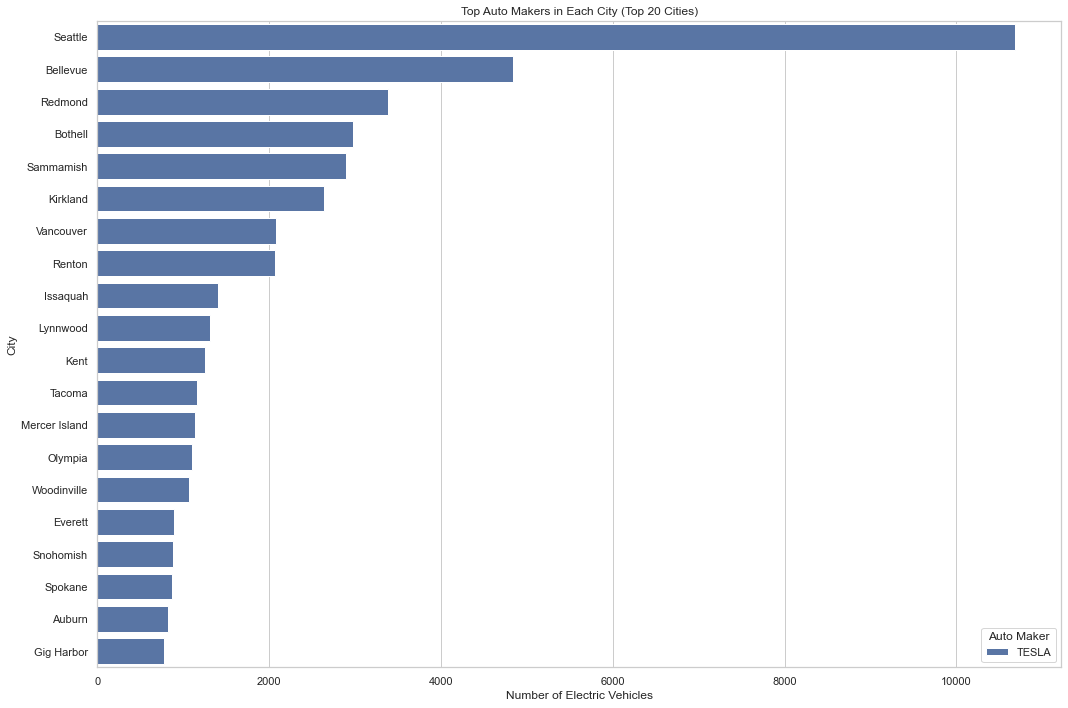

In [12]:
ev_data = pd.read_csv(file_path)

# Grouping the data by 'City' and 'Make' to find the dominance of auto makers in each city
city_make_grouping = ev_data.groupby(['City', 'Make']).size().reset_index(name='Count')

# Finding the top auto maker in each city by sorting within each city group
top_auto_makers_by_city = city_make_grouping.sort_values(by=['City', 'Count'], 
                                                         ascending=[True, False]).groupby('City').first().reset_index()

# Creating a plot to visualize the top auto makers in each city
plt.figure(figsize=(15, 10))

# Since there might be many cities, we'll plot the top 20 cities for clarity
top_20_cities = top_auto_makers_by_city.nlargest(20, 'Count')

sns.barplot(x='Count', y='City', hue='Make', data=top_20_cities, dodge=False)

plt.title('Top Auto Makers in Each City (Top 20 Cities)')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('City')
plt.legend(title='Auto Maker', loc='lower right')
plt.tight_layout()

plt.show()

#this is the graph that shows how which is the most dominant automaker across the city

#  Which top 3 auto makers dominate the market based on the city?


<Figure size 1080x720 with 0 Axes>

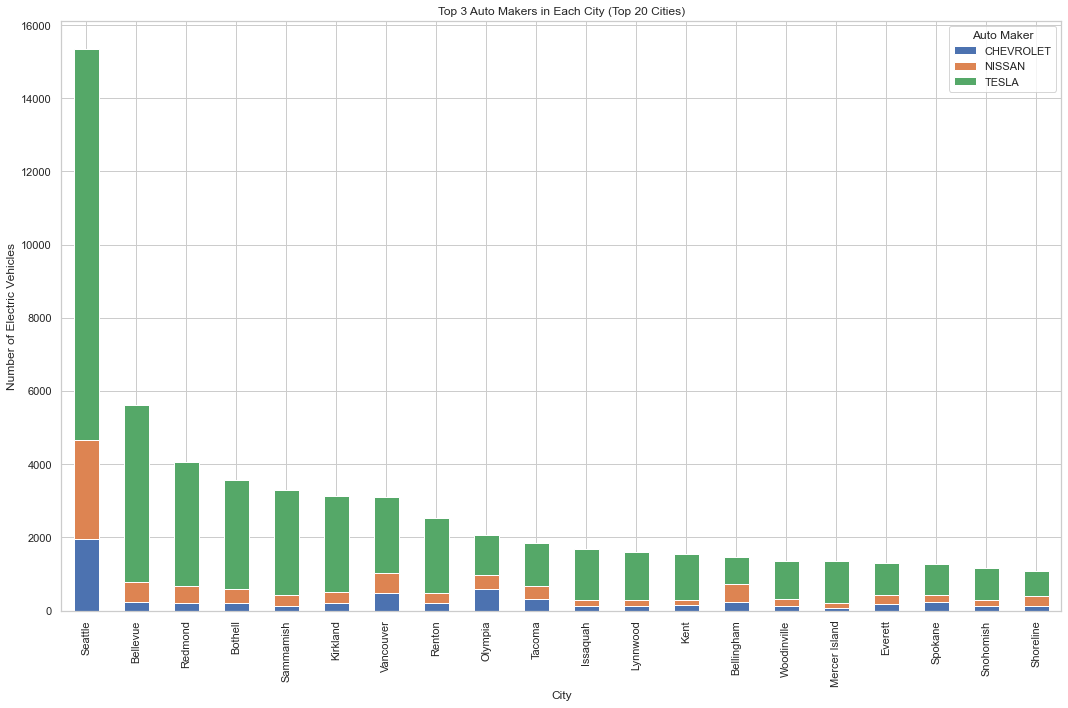

In [14]:
# Identifying the top 3 auto makers overall in the dataset
top_3_makers_overall = ev_data['Make'].value_counts().head(3).index.tolist()

# Filtering the dataset to include only the top 3 auto makers
top_3_makers_data = ev_data[ev_data['Make'].isin(top_3_makers_overall)]

# Grouping the filtered data by 'City' and 'Make', and then counting the number of vehicles for each city-make combination
city_make_top_3_overall_grouping = top_3_makers_data.groupby(['City', 'Make']).size().reset_index(name='Count')

# Creating a pivot table for plotting
pivot_table_top_3_overall = city_make_top_3_overall_grouping.pivot(index='City', columns='Make', values='Count').fillna(0)

# Sorting the pivot table by the total count for each city and selecting the top 20 cities
pivot_table_top_3_overall['Total'] = pivot_table_top_3_overall.sum(axis=1)
top_20_cities_top_3_makers_overall = pivot_table_top_3_overall.sort_values(by='Total', ascending=False).head(20).drop(columns='Total')

# Plotting
plt.figure(figsize=(15, 10))
top_20_cities_top_3_makers_overall.plot(kind='bar', stacked=True, figsize=(15, 10))

plt.title('Top 3 Auto Makers in Each City (Top 20 Cities)')
plt.xlabel('City')
plt.ylabel('Number of Electric Vehicles')
plt.legend(title='Auto Maker')
plt.tight_layout()

plt.show()


# the electric utility across the city

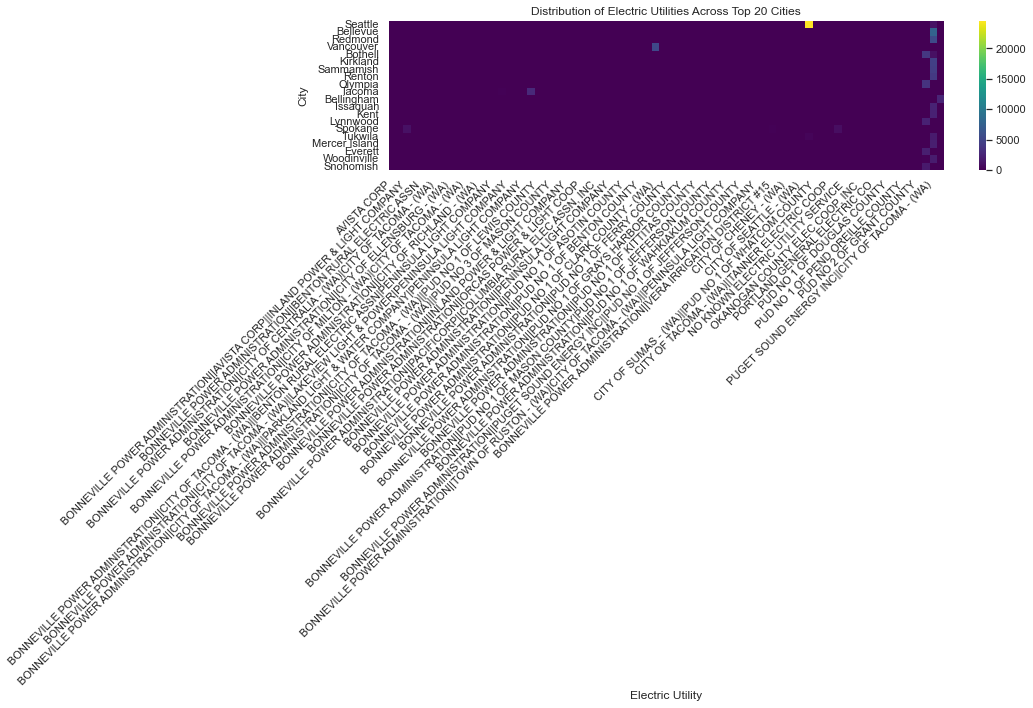

In [15]:

# Grouping the data by 'City' and 'Electric Utility' to find the distribution of electric utilities across cities
city_utility_grouping = ev_data.groupby(['City', 'Electric Utility']).size().reset_index(name='Count')

# Creating a pivot table for plotting
pivot_table_city_utility = city_utility_grouping.pivot(index='City', columns='Electric Utility', values='Count').fillna(0)

# For clarity in the plot, we will display the top 20 cities based on the total count of electric vehicles
pivot_table_city_utility['Total'] = pivot_table_city_utility.sum(axis=1)
top_20_cities_by_utility = pivot_table_city_utility.sort_values(by='Total', ascending=False).head(20).drop(columns='Total')

# Plotting
plt.figure(figsize=(15, 10))
sns.heatmap(top_20_cities_by_utility, annot=False, cmap='viridis')

plt.title('Distribution of Electric Utilities Across Top 20 Cities')
plt.xlabel('Electric Utility')
plt.ylabel('City')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


In [16]:

# Counting the number of unique electric utility providers in each city
unique_utilities_per_city = ev_data.groupby('City')['Electric Utility'].nunique()

# Counting the total number of EVs in each city
total_evs_per_city = ev_data.groupby('City').size()

# Calculating the ratio of EVs to number of utility providers in each city
ev_to_utility_ratio = total_evs_per_city / unique_utilities_per_city
ev_to_utility_ratio_sorted = ev_to_utility_ratio.sort_values(ascending=False)

# Displaying the top cities which might need more electric utility infrastructure
top_cities_needing_more_utilities = ev_to_utility_ratio_sorted.head(10)
top_cities_needing_more_utilities


City
Seattle      6418.75
Kirkland     4622.00
Sammamish    4436.00
Bellevue     3845.50
Redmond      2751.00
Vancouver    2655.00
Bothell      2430.50
Issaquah     2365.00
Kent         2276.00
Lynnwood     2210.00
dtype: float64

In [ ]:
#Seattle: For every electric utility provider in Seattle,
#there are approximately 6418.75 EVs. 
#This suggests a high density of EVs per utility provider.
#From the output, Seattle shows the highest ratio with approximately 6418.75 EVs per electric utility provider, 
#suggesting that among the listed cities, 
#Seattle has the highest need for additional electric vehicle charging infrastructure.